## Two types of data in machine learning
- Supervised data: has one or multiple targets associated with it
- Unsupervised data: does not have any target variable

  A supervised problem is considerably easier to tackle than an unsupervised one. A problem in which we are required to predict a value is known as a supervised problem. For example, if the problem is to predict house prices given historical house prices, with features like presence of a hospital, school or supermarket, distance to nearest public transport, etc. is a upervised problem. Similarly, when we are provided with images of cats and dogs, and we know beforehand which ones are cats and which ones are dogs, and if the task is to create a model which predicts whether a provided image is of a cat or a dog, the problem is considered to be supervised.

Here in this Dataset we have a Supervised Machine Learning Problem, For Heart Failure Prediction

In [2]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("heart2.csv")
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

Want to use the describe() function from pandas as very helpful!! In order to do that though we need to work with certain datatypes

In [4]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

AS you can see the data types are objects, we want to convert them into strings in order to work with them...

In [5]:
string_col = df.select_dtypes(include="object").columns
df[string_col] = df[string_col].astype("string")
df.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

They are now strings tadaaaa
### We want to noe work with categorical data

In [6]:
string_col = df.select_dtypes(include="string").columns.to_list() # grabbing all the string_columns again

In [7]:
num_col = df.columns.to_list() # put all the columns in a list
# remove all the columns in the string_col list from the num_col list
for col in string_col:
    num_col.remove(col)

num_col.remove("HeartDisease")
num_col

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [8]:
df.describe().T #I love this, you use.T to change the layout of the results given

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

### Exploratory Data Analysis
- Understanding the dataset helsp us clean it
- gives a clear picture of the features and the relationships between them
- Providing guidelines essential variables and leaving behind non-essential ones
- Handling missing values or human error
- identifying outliers
- EDA process would be maximising insights of dataset
- the process is time consuming but very effective.

### Correlation Matrix
It's necessary apperently to remove correlated variables to improve our model. we can find correlated variables using the pandas corr() function. it can be visualised using the plotly.express imshow().


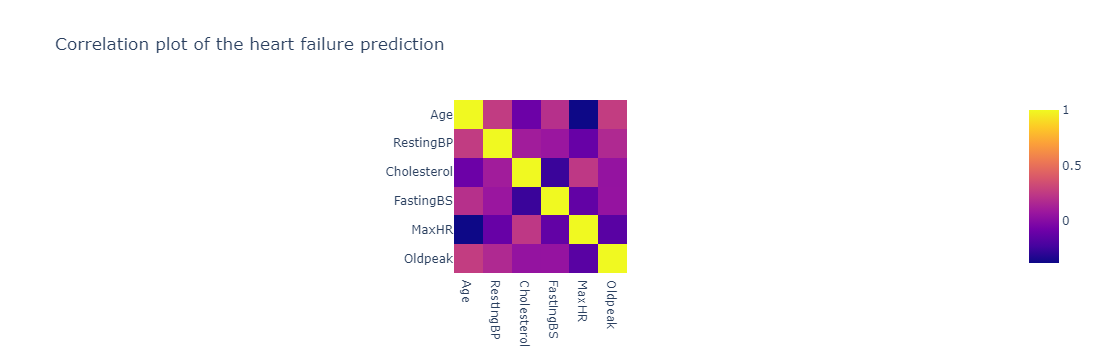

In [9]:
px.imshow(df[num_col].corr(), title = "Correlation plot of the heart failure prediction")

On the worksheet is has Heart Disease at the bottom so it's clear he is doing something else around the worksheet but you see a couple strong correlations with HeartDisease to certain predictors...

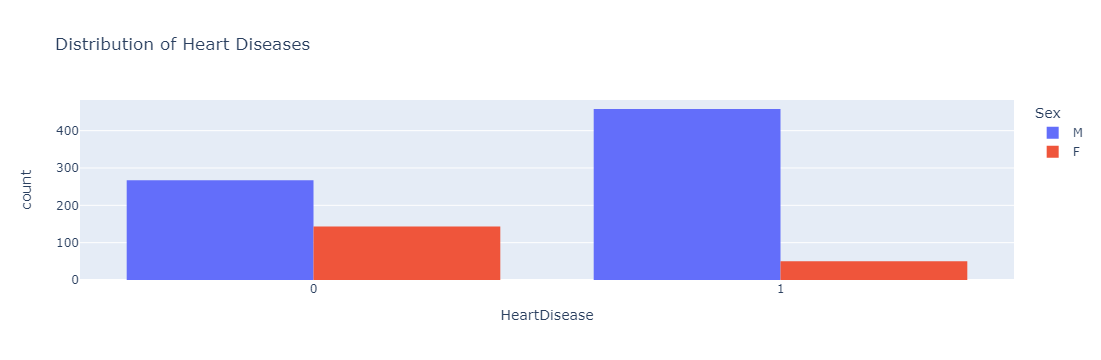

In [10]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

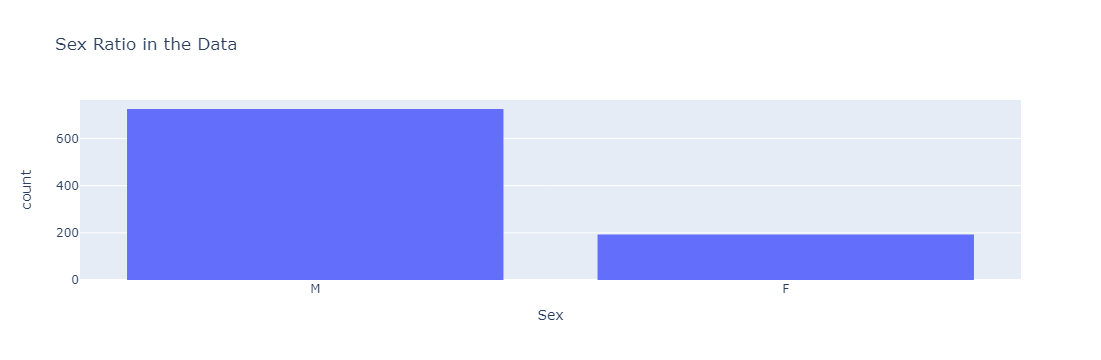

In [11]:
fig=px.histogram(df,
                 x="Sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

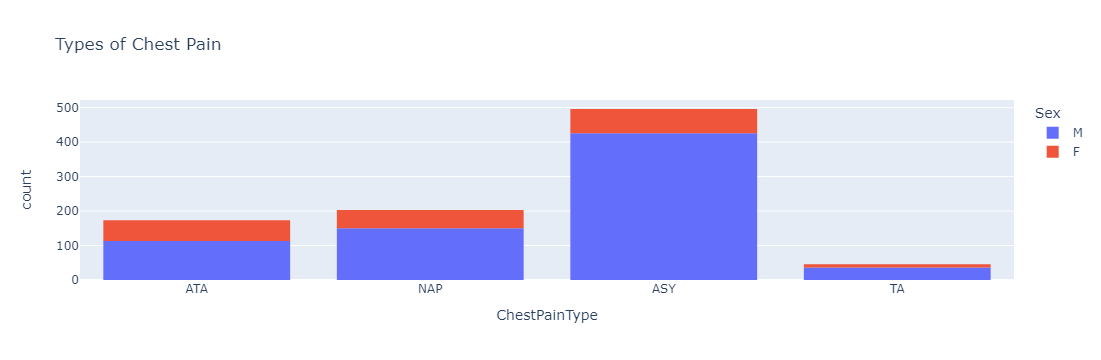

In [12]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

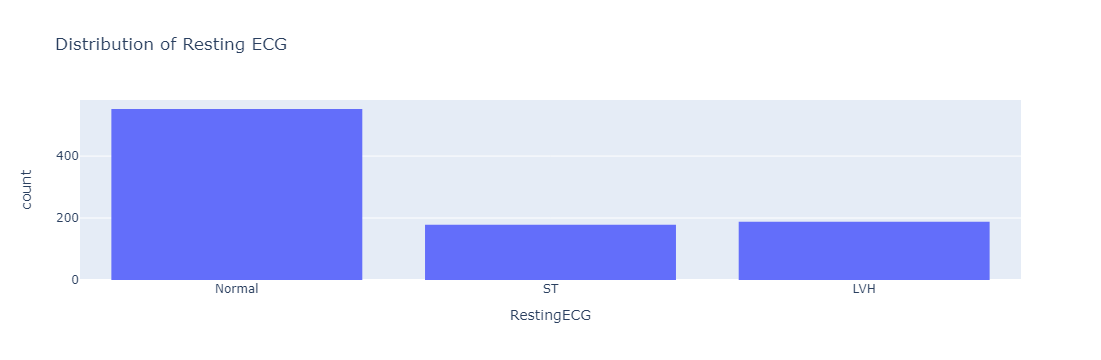

In [13]:
fig=px.histogram(df,
                 x="RestingECG",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG")
fig.show()

To plot multiple pairwise bivariate distributions in a dataset you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

[]

<Figure size 1500x1000 with 0 Axes>

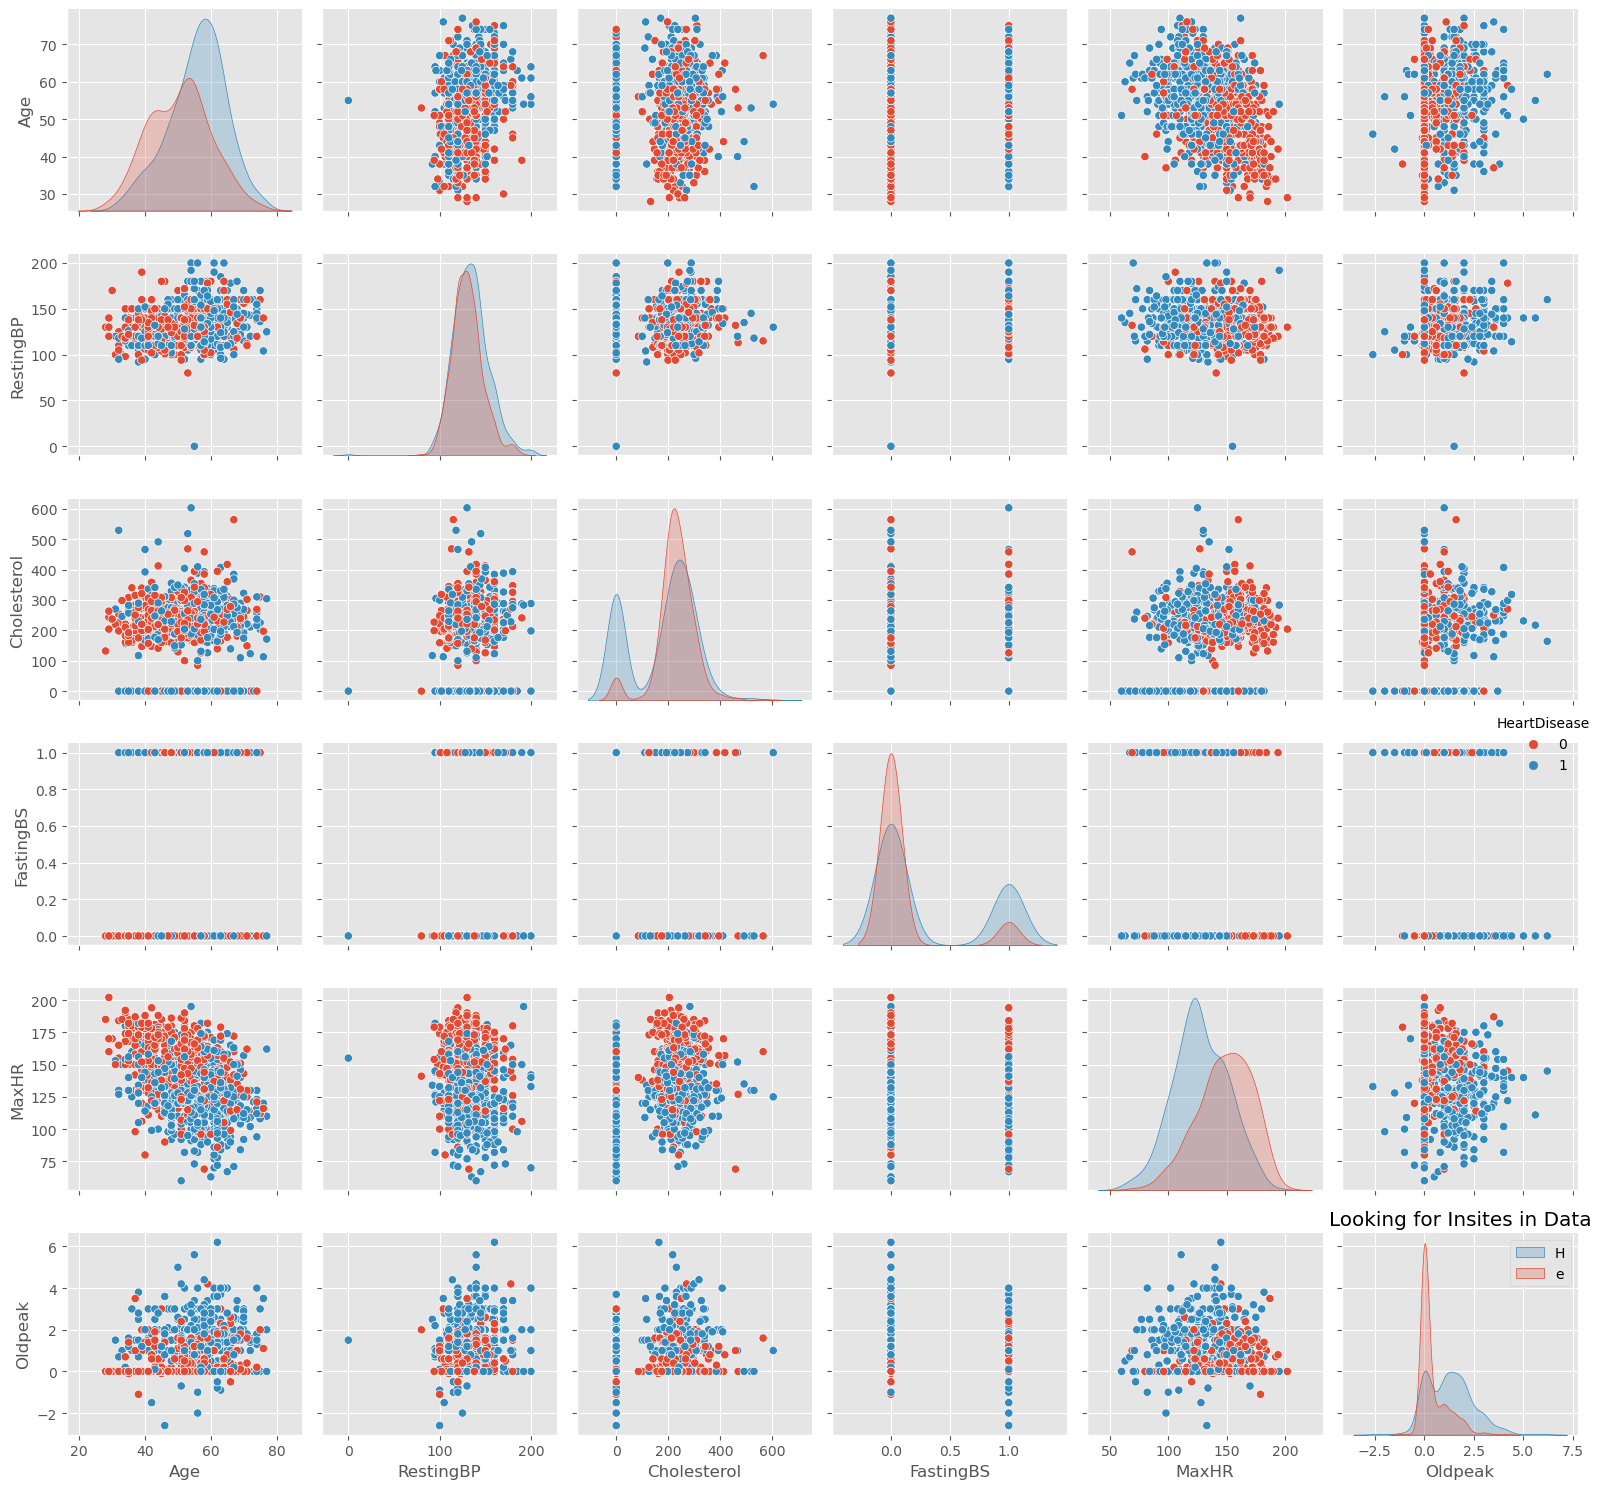

In [14]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

To check the "Linearity" of the variables it is good practice to plot a distribution graph and look for skewness of features.
Kernel Density estimate (Kde) is a useful tool for plotting the shape of a distribution.

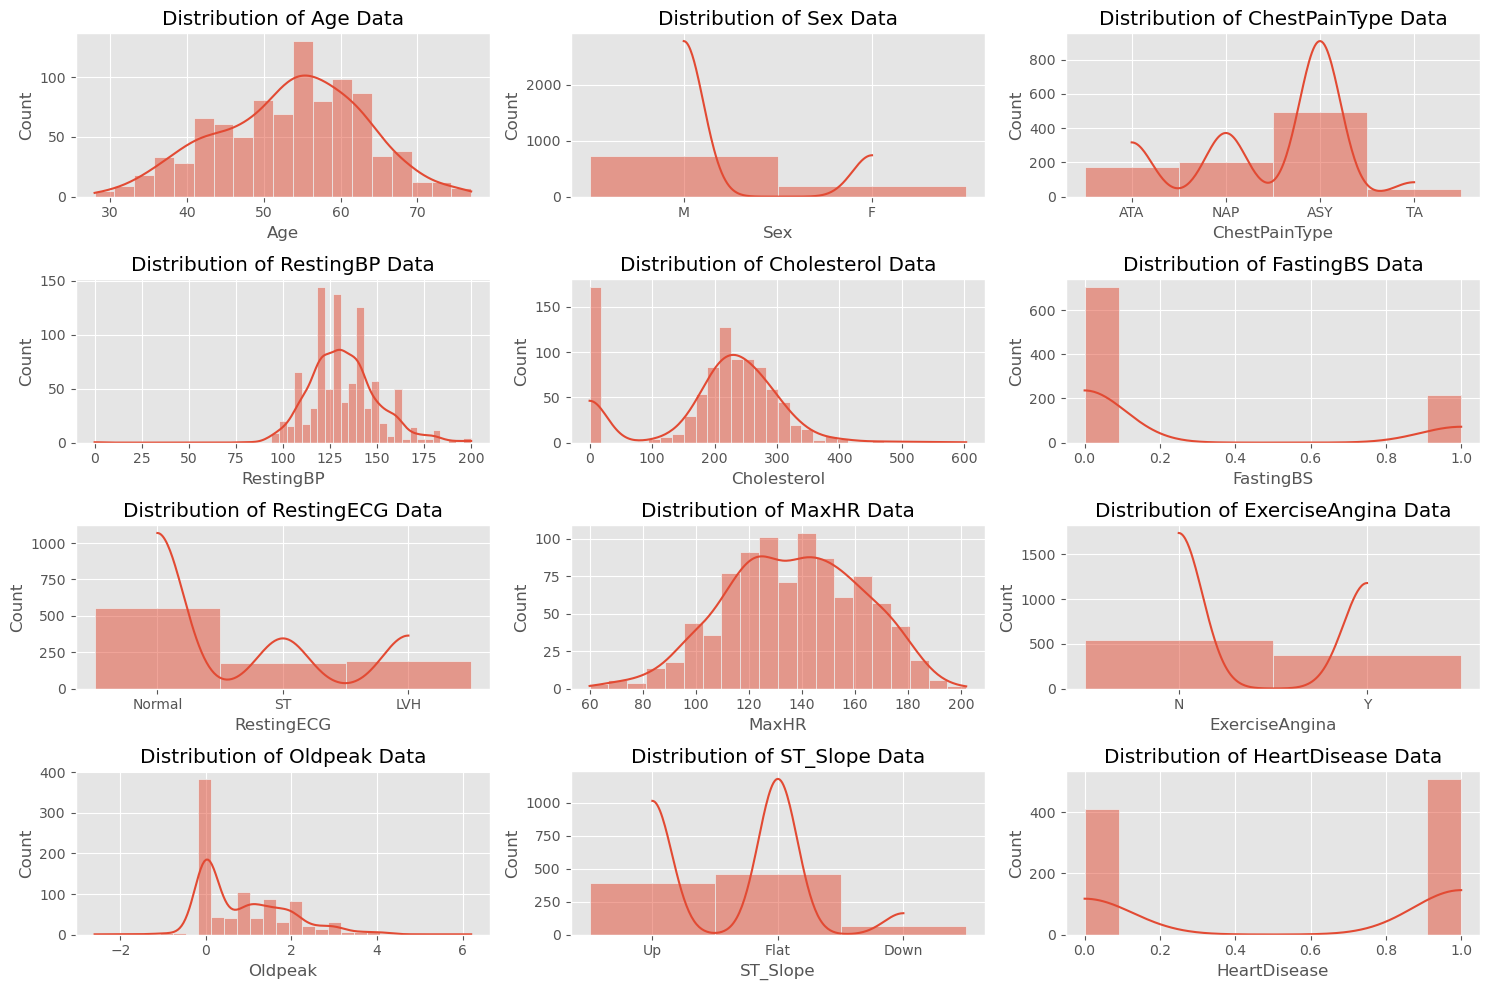

In [15]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

## Outliers
A box plot (box and whisker plot) shows the distribution of quantitative data that allows comparisons between variables. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution. The box plot is a standardized way of displaying the distribution of data, based on the five number summary.

- Minimum
- First Quartile
- Median
- Third Quartile
- Maximum

In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR).A segment inside the rectangle shows the median and “whiskers” above and below the box show the locations of the minimum and maximum.aximum.

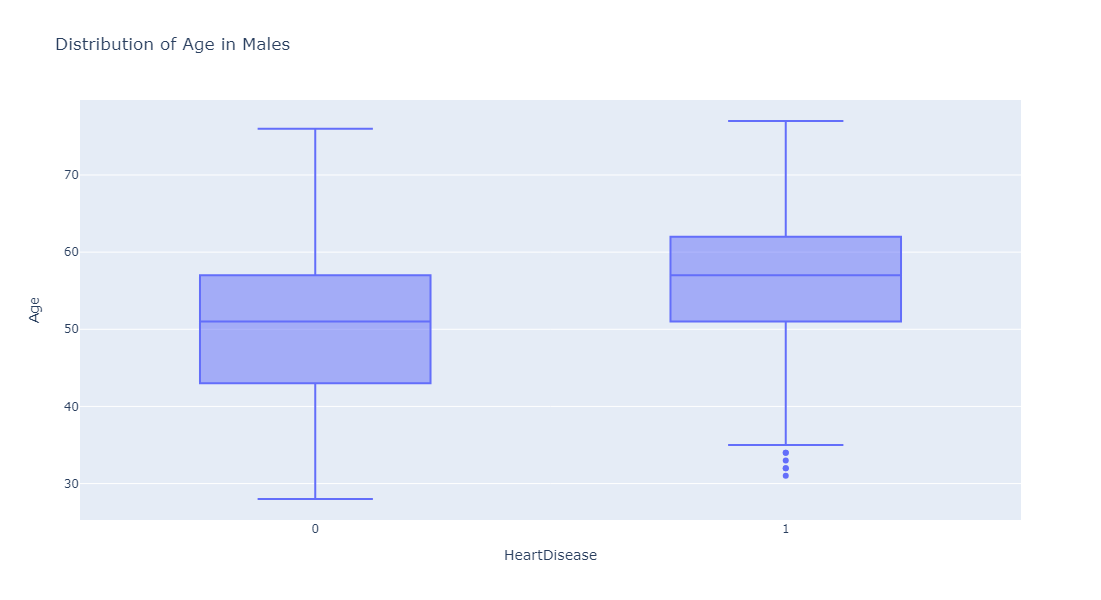

In [16]:
fig = px.box(df, x="HeartDisease", y="Age", title = "Distribution of Age in Males", width = 800, height = 600)
fig.show()

### Data Preprocessing

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

1. Handling Null values
2. Feature Scaling
3. Handling Categorical values.


### Handling Null values
this is a clean dataset so make sure you are getting some practice with untidy datasets.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [18]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

You can see it is clean. worksheet goes on to talk about imputation. When you have null values you can easily remove the row. However, it is not the best option to remove the rows and columns from our dataset as it can result in significant information loss. If you have 300K data points then removing 2–3 rows won’t affect your dataset much but if you only have 100 data points and out of which 20 have NaN values for a particular field then you can’t simply drop those rows. In real-world datasets, it can happen quite often that you have a large number of NaN values for a particular field. Ex — Suppose we are collecting the data from a survey, then it is possible that there could be an optional field which let’s say 20% of people left blank. So when we get the dataset then we need to understand that the remaining 80% of data is still useful, so rather than dropping these values we need to somehow substitute the missing 20% values. We can do this with the help of Imputation.

#### Imputation

Imputation is simply the process of substituting the missing values of our dataset. We can do this by defining our own customised function or we can simply perform imputation by using the SimpleImputer class provided by sklearn.

For example :

In [19]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer = imputer.fit(df[['Weight']])
# df['Weight'] = imputer.transform(df[['Weight']])
# ## gives an error because there are no Null/NaN values

## 2. Feature Scaling

#### Why should we use feature scaling?
The first question we need to address – why do we need to scale the variables in our dataset? Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Let me explain that in more detail.

### 1. Distance based Algorithms

Distance algorithms like "KNN" (K-Nearest Neighbour), "K-means" and "SVM" are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity. Whem two features have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards one feature.

Therefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the resul

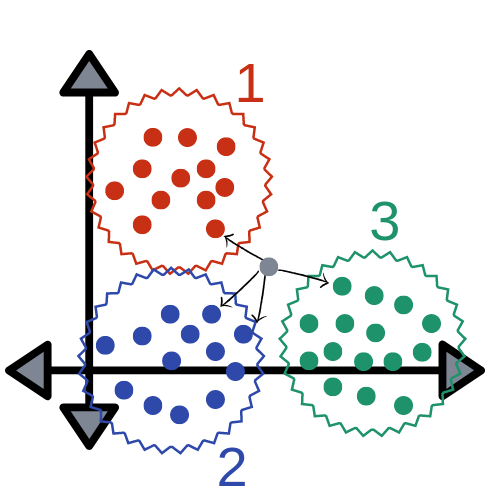t.

### 2. Tree based algorithms

Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. Think about it, a decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features.

So, there is virtually no effect of the remaining features on the split. This is what makes them invariant to the scale of the feature
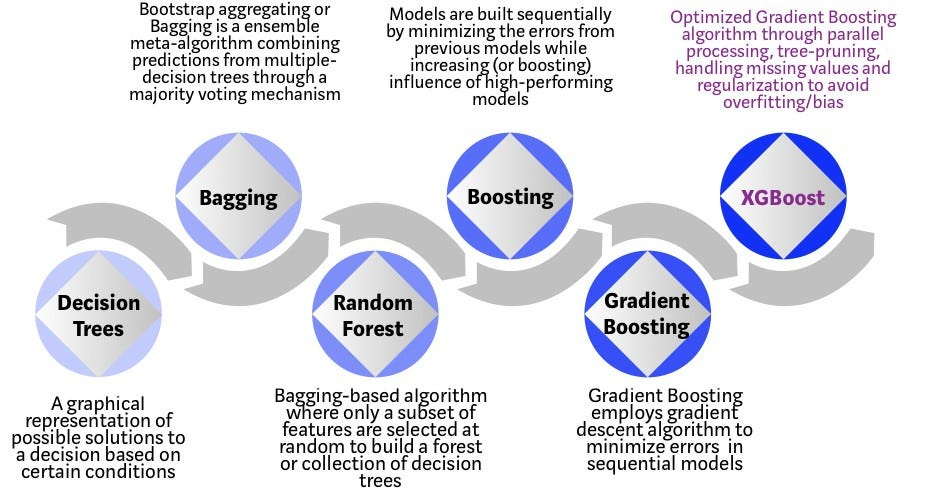s!

#### What is Normalization

Normalisation is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as min-max scaling:


Here, Xmax and Xmin are the maximum and the minimum values of the feature respectively.

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0 On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1 If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and. 1

### What is Standardization?

Standardization is another scaling technique where the values are centred around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. 



YOu may notice that this formula is the same as the Zero-mean normalisation method and you would be correct, generally this method is referred to as standardization. when we say Normalization we are refferring to min max normalzation.

#### The Big Question: Normalization or Standardization?

THis question is an eternal question among machine learning newcomers. Lets elaborate.

- Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be uself in algorithms that do not assume any distribution of the data like K-nearest algorithms and Neurl Networks.
  
- Standardization on the other hand can be useful in cases where the data follows a gaussian ditribution. However this does not have to be necessarily true. Also, unlike Normalization, standardization does not have a bounding range. so even if you have outliers in your data they will not be affected by standardization.

However, at the end of the day the choice of using normalization or standardization will depend on the problem and machine learning algorithm used. There is no hard and fast rule to tell you when to normalize or standardize

#### Robust Scaler

When working with outliers we can use Robust Scaling for scaling our data, it scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range of the 1st and 3rd quartile (IQR). The median and IQR are then stored so that they can be used on future data using the transform method. If outliers are present in the dataset then the median and IQR provide a betterresults and out perform sample mean and variance. RobustScaler uses the interquartile range so that it is robust to outliers

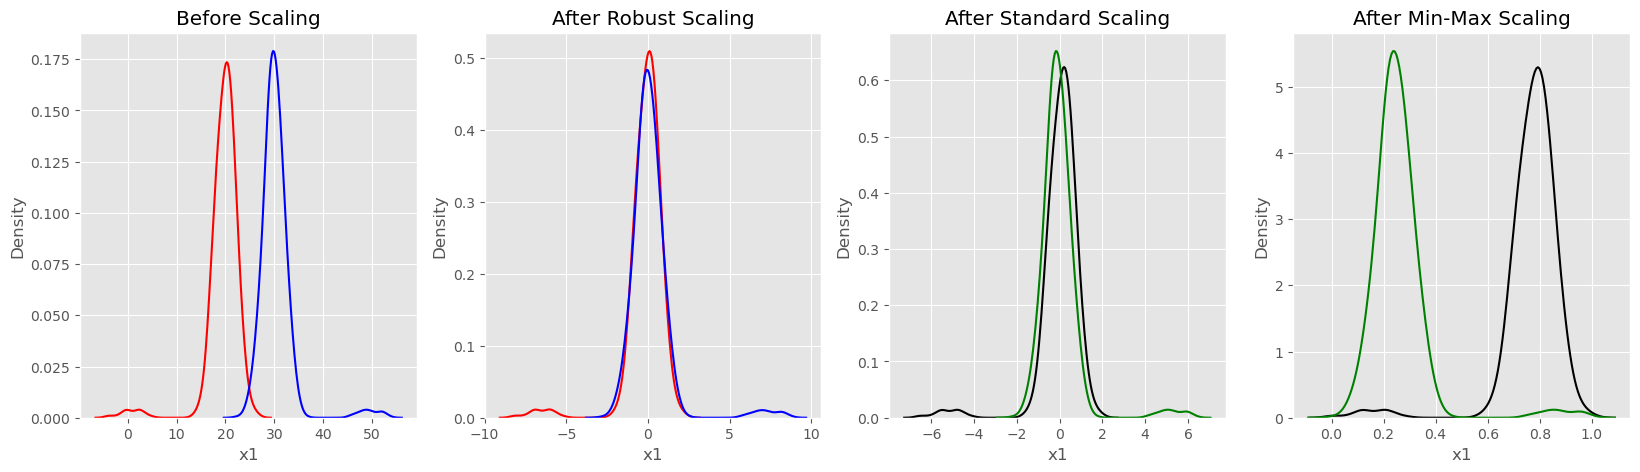

In [20]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]), # np.random.normal(mean, std, size) so a big group at 20 and a little one at 1
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),# same here just big peak at 30 and little peak at 50
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

### Handling Categorical Variables
categorical variables/ features are any feature type that can be classified into two major types:

- Nominal
- Ordinal

Nominal variables are variables that have two or more categories which do not have any kind of order associated with them. For example, if gender is classified into two groups, i.e. male and female, it can be considered as a nominal variable. Ordinal values, on the other hand, have “levels” or categories with a particular order associated with them. For example, an ordinal categorical variable can be a feature with three different levels: Low, Medium and High. Order is important

It is a binary classification problem: the target here is not skewed but we use the best metric for this binary classification problem which would be Area Under the ROC Curve (AUC). We can use precision and recall too, but AUC combines these two metrics. Thus, we will be using AUC to evaluate the model that we build on this dataset.

we have to know that computers do nit understand text data and therefore, we need to convert these categories to numbers.
A simple way to this would be Label Encoding or One Hot encoding


In [21]:
#from sklearn.preprocessing import LabelEncoder #Label Encoding
# pd.get_dummies() # One Hot encoding

We need to understand where to use each one though

#### For Tree based Machine Learnig algorithms the best way to go is with Label Encoding.

- LabelEncoder can turn [dog, cat, dog, mouse, cat] into [1, 2, 1, 3, 2], but then the imposed ordinality means that the average of dog and mouse is cat. Still there are algorithms like decision trees and random forests that can work with categorical variables just fine and Label Encoder can be used to store variables with less disc space.

#### For non Tree based Machine Learning algorithms the best way to go is One Hot Encoding.

- One-Hot_encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orhtogonal vector space.

- The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality. In these cases One-hot-encoding can be used followed by PCA (Principal component analysis: used to reduce the dimensionality of a dataset). PCA finds the linear overlap so will tend to group similar features into the same feature.

In [22]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())
    print("\n")

The distribution of categorical valeus in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: Int64


The distribution of categorical valeus in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64


The distribution of categorical valeus in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64


The distribution of categorical valeus in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64


The distribution of categorical valeus in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64




In [23]:
# As we will be using both approaches for Categorical data and then tree/non-tree based machine learning algorithms
# lets do LabelEncoding first which will be used with tree based algorithms
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     12    1              1         41          147          0           1   
1     21    0              2         55           40          0           1   
2      9    1              1         31          141          0           2   
3     20    0              0         39           72          0           1   
4     26    1              2         49           53          0           1   
5     11    1              2         22          189          0           1   
6     17    0              1         31           95          0           1   
7     26    1              1         14           66          0           1   
8      9    1              0         41           65          0           1   
9     20    0              1         22          142          0           1   
10     9    0              2         31           69          0           1   
11    30    1              1         37           24          0           2   
12    11    1              1         22           62          0           1   
13    21    1              0         41           92          0           1   
14    14    0              2         18           69          0           2   
15    26    0              1         22          131          0           1   
16    10    1              0         14           54          0           1   
17    15    0              1         22           59          0           1   
18    32    1              0          7          106          0           1   
19     8    1              1         22          125          0           1   
20    15    0              3          7           81          0           1   
21    16    1              1         22           44          0           1   
22    21    0              1         25           59          0           1   
23    16    1              1         49          146          0           1   
24    12    1              2         31           73          0           1   
25     8    1              2         31           67          0           1   
26    25    1              0         25          118          0           2   
27    24    1              1         22          142          0           1   
28    25    0              1         16          216          0           1   
29    23    1              1         26           48          0           1   
30    25    1              2         46          218          0           1   
31    28    1              2         31           27          0           1   
32    26    1              0         26           82          0           1   
33    13    1              0         31           32          0           2   
34    15    0              1         49           46          0           1   
35     4    1              1         26          112          0           1   
36    37    1              0         41          162          1           1   
37    13    0              1         14          108          0           2   
38    20    0              1         22           37          1           2   
39    20    0              0         49           85          0           1   
40    26    0              1         49           88          0           1   
41    26    0              2         31          152          0           2   
42     7    1              1         49          122          0           1   
43    24    1              2         41          117          0           2   
44    15    1              0         22           35          0           1   
45    31    1              2         31          172          0           1   
46     9    1              0         22           81          0           1   
47    22    1              1         41           74          0           1   
48     8    1              2         15          190          0           1   
49    13    1              0         14          147   

We can use this directly in tree based models

- Decision Trees
- Random Forest
- Extra Trees
- or any kind of boosted tree model
      - XGBoost
      - GBM
      - Light GBM
This type of encoding cannot be used in linear models, Support vector Machines or Neural Networks as they expect the data to be normalized (Standardized). For these types we can Binarise the data as shown below:

In [24]:
# Creating One Hot Encoding features to work with Non-Tree based machine Learning algorithms
df_nontree = pd.get_dummies(df, columns=string_col, drop_first=False)
df_nontree = df_nontree.astype(int) # converts bools to numeric binary
df_nontree.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172        0             0   
1   49        160          180          0    156        1             1   
2   37        130          283          0     98        0             0   
3   48        138          214          0    108        1             1   
4   54        150          195          0    122        0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0      0      1                  0  ...                  0                 0   
1      1      0                  0  ...                  1                 0   
2      0      1                  0  ...                  0                 0   
3      1      0                  1  ...                  0                 0   
4      0      1                  0  ...                  1                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0               0                  1              0                 1   
1               0                  1              0                 1   
2               0                  0              1                 1   
3               0                  1              0                 0   
4               0                  1              0                 1   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0                 0              0              0            1  
1                 0              0              1            0  
2                 0              0              0            1  
3                 1              0              1            0  
4                 0              0              0            1  

[5 rows x 21 columns]

In [25]:
# Getting the target column at the end
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
0   40        140          289          0    172        0      0      1   
1   49        160          180          0    156        1      1      0   
2   37        130          283          0     98        0      0      1   
3   48        138          214          0    108        1      1      0   
4   54        150          195          0    122        0      0      1   

   ChestPainType_ASY  ChestPainType_ATA  ...  ChestPainType_TA  \
0                  0                  1  ...                 0   
1                  0                  0  ...                 0   
2                  0                  1  ...                 0   
3                  1                  0  ...                 0   
4                  0                  0  ...                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0               0                  1              0                 1   
1               0                  1              0                 1   
2               0                  0              1                 1   
3               0                  1              0                 0   
4               0                  1              0                 1   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  HeartDisease  
0                 0              0              0            1             0  
1                 0              0              1            0             1  
2                 0              0              0            1             0  
3                 1              0              1            0             1  
4                 0              0              0            1             0  

[5 rows x 21 columns]

### Choosing the right cross validation

Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. It is used to detect overfitting, i.e. failure to generalize a pattern
Depends on the dataset you are working with, one's choice of cross validation technique may or may not apply to other datasets. However, there are a few types of cross-validation that are common and widely ued. Namely:

- k-fold cross-validation
- stratified k-fold cross-validation

### 1. K-fold Cross-Validation
WE divide the samples and targets associated with them. We can divide the data into K different sets that are exclusive of each other. We cansplit any data into k-equal parts using KFold from scikitlearn. Each sample is assigned a value from 0 to k-1.

### 2. Stratified K-fold Cross-validation
If you have a skewed set for binary classification of 90% positive values and 10% negative values then you don't want to use K-fold cross-validation. Using simple K-fold Cross-validation for datasets like these can result in folds of all negative samples. Instead Stratified K-fold cross_validation, keeps the ratio of positive to negative samples the same in each fold. SO in each fold you will have 90% positive and 10% negative. Therefore whatever metric you choose to evaluate you will get similar results across the folds.

## Training our Machine Learning Model

#### Non-Tree Based ML algorithms
lets start with these

#### Logistic Regression

Logistic regression is a calculation used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead, etc.

Independent variables are analyzed to determine the binary outcome with the results falling into one of two categories. The independent variables can be categorical or numeric, but the dependent variable is always categorical. Written like this:

P(Y=1|X) or P(Y=0|X)

It calculates the probability of dependent variable Y, given independent variable X.

This can be used to calculate the probability of a word having a positive or negative connotation (0, 1, or on a scale between). Or it can be used to determine the object contained in a photo (tree, flower, grass, etc.), with each object given a probability between 

0 and 1.

In [26]:
feature_col_nontree=df_nontree.columns.to_list() # remember we used On-hot encoding to binarise teh categorical data
feature_col_nontree.remove(target) # makes a list of all the features except the HeartDisease column.

In [27]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log = []

kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    #print(pd.DataFrame(X_valid).head())
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    
    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.93      0.83      0.88       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

The accuracy for Fold 1 : 0.8800813008130083
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        82
           1       0.91      0.81      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for Fold 2 : 0.8580822572931611
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                       

### 2. Using Naive Bayers

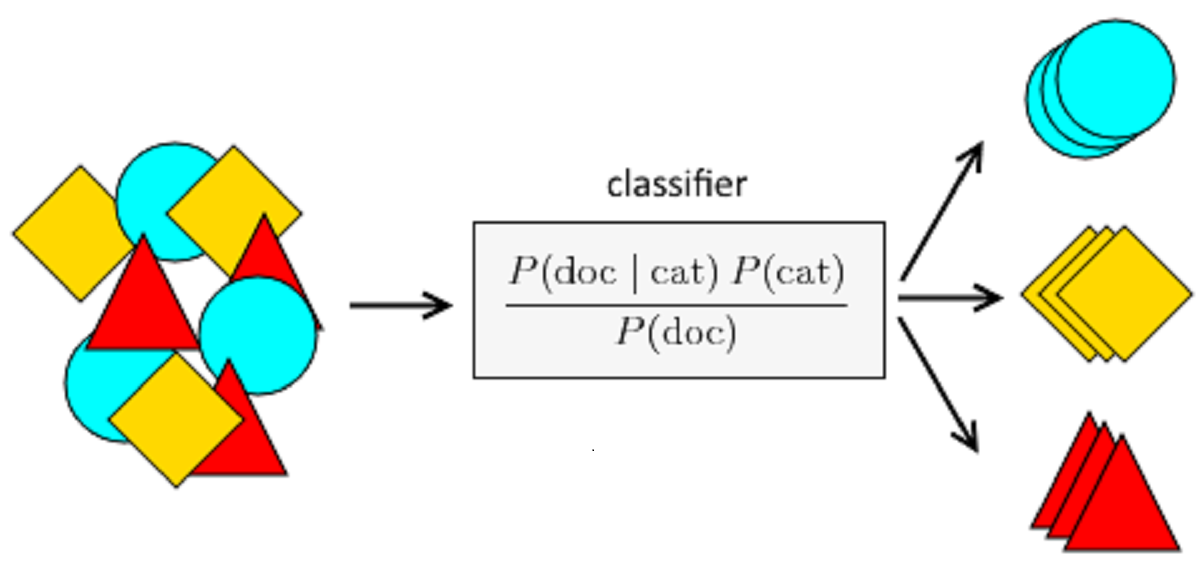

In [28]:
from sklearn.naive_bayes import GaussianNB
acc_Gauss=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=GaussianNB()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Gauss.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        82
           1       0.92      0.80      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for 1 : 0.8592778574844573
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        82
           1       0.92      0.83      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.87      0.87       184

The accuracy for 2 : 0.8739837398373984
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.63      0.76        82
           1       0.77      0.98      0.86       102

    accuracy                           0.83  

### 3. Using Support Vector Machine

A support vector machine (SVM) uses algorithms to train and classify data within degrees of polarity, taking it to a degree beyond X/Y prediction.

For a simple visual explanation, we’ll use two tags: red and blue, with two data features: X and Y, then train our classifier to output an X/Y coordinate as either red or blu
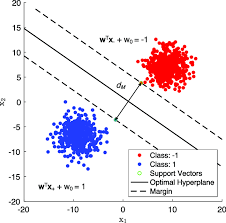

The SVM then assigns a hyperplane that best separates the tags. In two dimensions this is simply a line. Anything on one side of the line is red and anything on the other side is blue. In sentiment analysis, for example, this would be positive and negative.

In order to maximize machine learning, the best hyperplane is the one with the largest distance between each t.

However, as data sets become more complex, it may not be possible to draw a single line to classify the data into two camps:



SVM allows for more accurate Machine Learning because it is Multi-dimensional

We need to choose the best Kernel according to our need

- The Linear kernel is mostly preferred for text classification as it is good for large datasets
- Gaussian Kernels tend to do well when there is no additional information regarding data that is not available
- Radial Basis Function (RBF) kernel is also a kind of gaussian kernel that projects the high dimesnional data and then searches a linear separation for it.
- Polynomial kernels give good results when the data is normalised alized.g:e.

In [29]:
# Using Linear Kernel
from sklearn.svm import SVC
acc_svm=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="linear")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm.append(acc)
    print(f"The accuracy for {fold+1} : {acc}") ## I don't know why he puts fold + 1 when the accuracy is talking about just fold
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        82
           1       0.92      0.83      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.87      0.87       184

The accuracy for 1 : 0.8739837398373984
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        82
           1       0.92      0.79      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for 2 : 0.8543758967001435
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                           0.83  

In [30]:
## Using Sigmoid Kernel
from sklearn.svm import SVC
acc_svm_sig=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="sigmoid")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_sig.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        82
           1       0.89      0.75      0.81       102

    accuracy                           0.81       184
   macro avg       0.82      0.82      0.81       184
weighted avg       0.82      0.81      0.81       184

The accuracy for 1 : 0.8176709708273554
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        82
           1       0.81      0.75      0.78       102

    accuracy                           0.77       184
   macro avg       0.76      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184

The accuracy for 2 : 0.7676948828311813
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.84      0.72      0.78        82
           1       0.80      0.89      0.84       102

    accuracy                           0.82  

In [31]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_rbf=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="rbf")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_rbf.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        82
           1       0.91      0.94      0.93       102

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184

The accuracy for 1 : 0.9157101865136298
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8433763749402199
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.89      0.70      0.78        82
           1       0.79      0.93      0.86       102

    accuracy                           0.83  

In [32]:
## Using poly kernel
from sklearn.svm import SVC
acc_svm_poly=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="poly")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_poly.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        82
           1       0.92      0.89      0.91       102

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

The accuracy for 1 : 0.897297943567671
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8433763749402199
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.93      0.62      0.74        82
           1       0.76      0.96      0.85       102

    accuracy                           0.81   

### Using K-nearest Neighbours

The optimal K value usually found is the square root of N, where N is the total number of samples

K-nearest neighbors (k-NN) is a pattern recognition algorithm that uses training datasets to find the k closest relatives in future examples.

When k-NN is used in classification, you calculate to place data within the category of its nearest neighbor. If k = 1, then it would be placed in the class nearest 1. K is classified by a plurality poll of its neighb

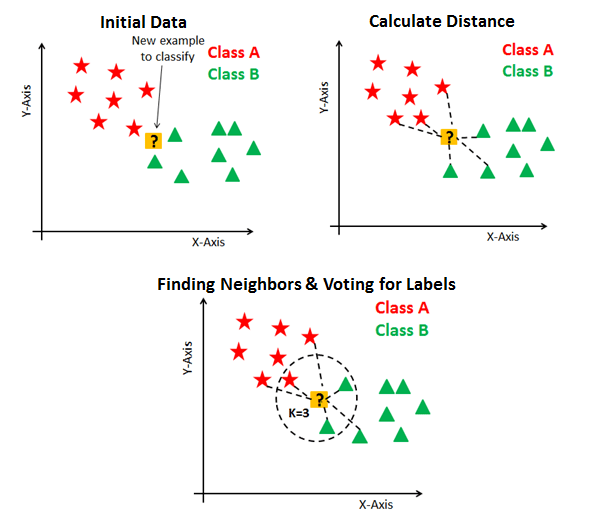
ors.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
acc_KNN=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=KNeighborsClassifier(n_neighbors=32)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_KNN.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        82
           1       0.93      0.93      0.93       102

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184

The accuracy for 1 : 0.9230033476805357
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        82
           1       0.92      0.80      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for 2 : 0.8592778574844573
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        82
           1       0.81      0.95      0.87       102

    accuracy                           0.85  

## Tree Based ALgorithms

### Using Decision tree Algorithms
A decision tree is a supervised learning algorithm that is perfect for classification problems, as it’s able to order classes on a precise level. It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar. This creates categories within categories, allowing for organic classification with limited human supervision.

In [34]:
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

In [35]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.65      0.85      0.74        82
           1       0.84      0.64      0.73       102

    accuracy                           0.73       184
   macro avg       0.75      0.75      0.73       184
weighted avg       0.76      0.73      0.73       184

The accuracy for 1 : 0.745456719273075
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.69      0.88      0.77        82
           1       0.87      0.68      0.76       102

    accuracy                           0.77       184
   macro avg       0.78      0.78      0.77       184
weighted avg       0.79      0.77      0.77       184

The accuracy for 2 : 0.7772596843615496
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.88      0.62      0.73        82
           1       0.75      0.93      0.83       102

    accuracy                           0.79   

In [36]:
!pip install graphviz

In [ ]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_col_tree,  
                                class_names=target,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

### Using Random Forest Classifier

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).

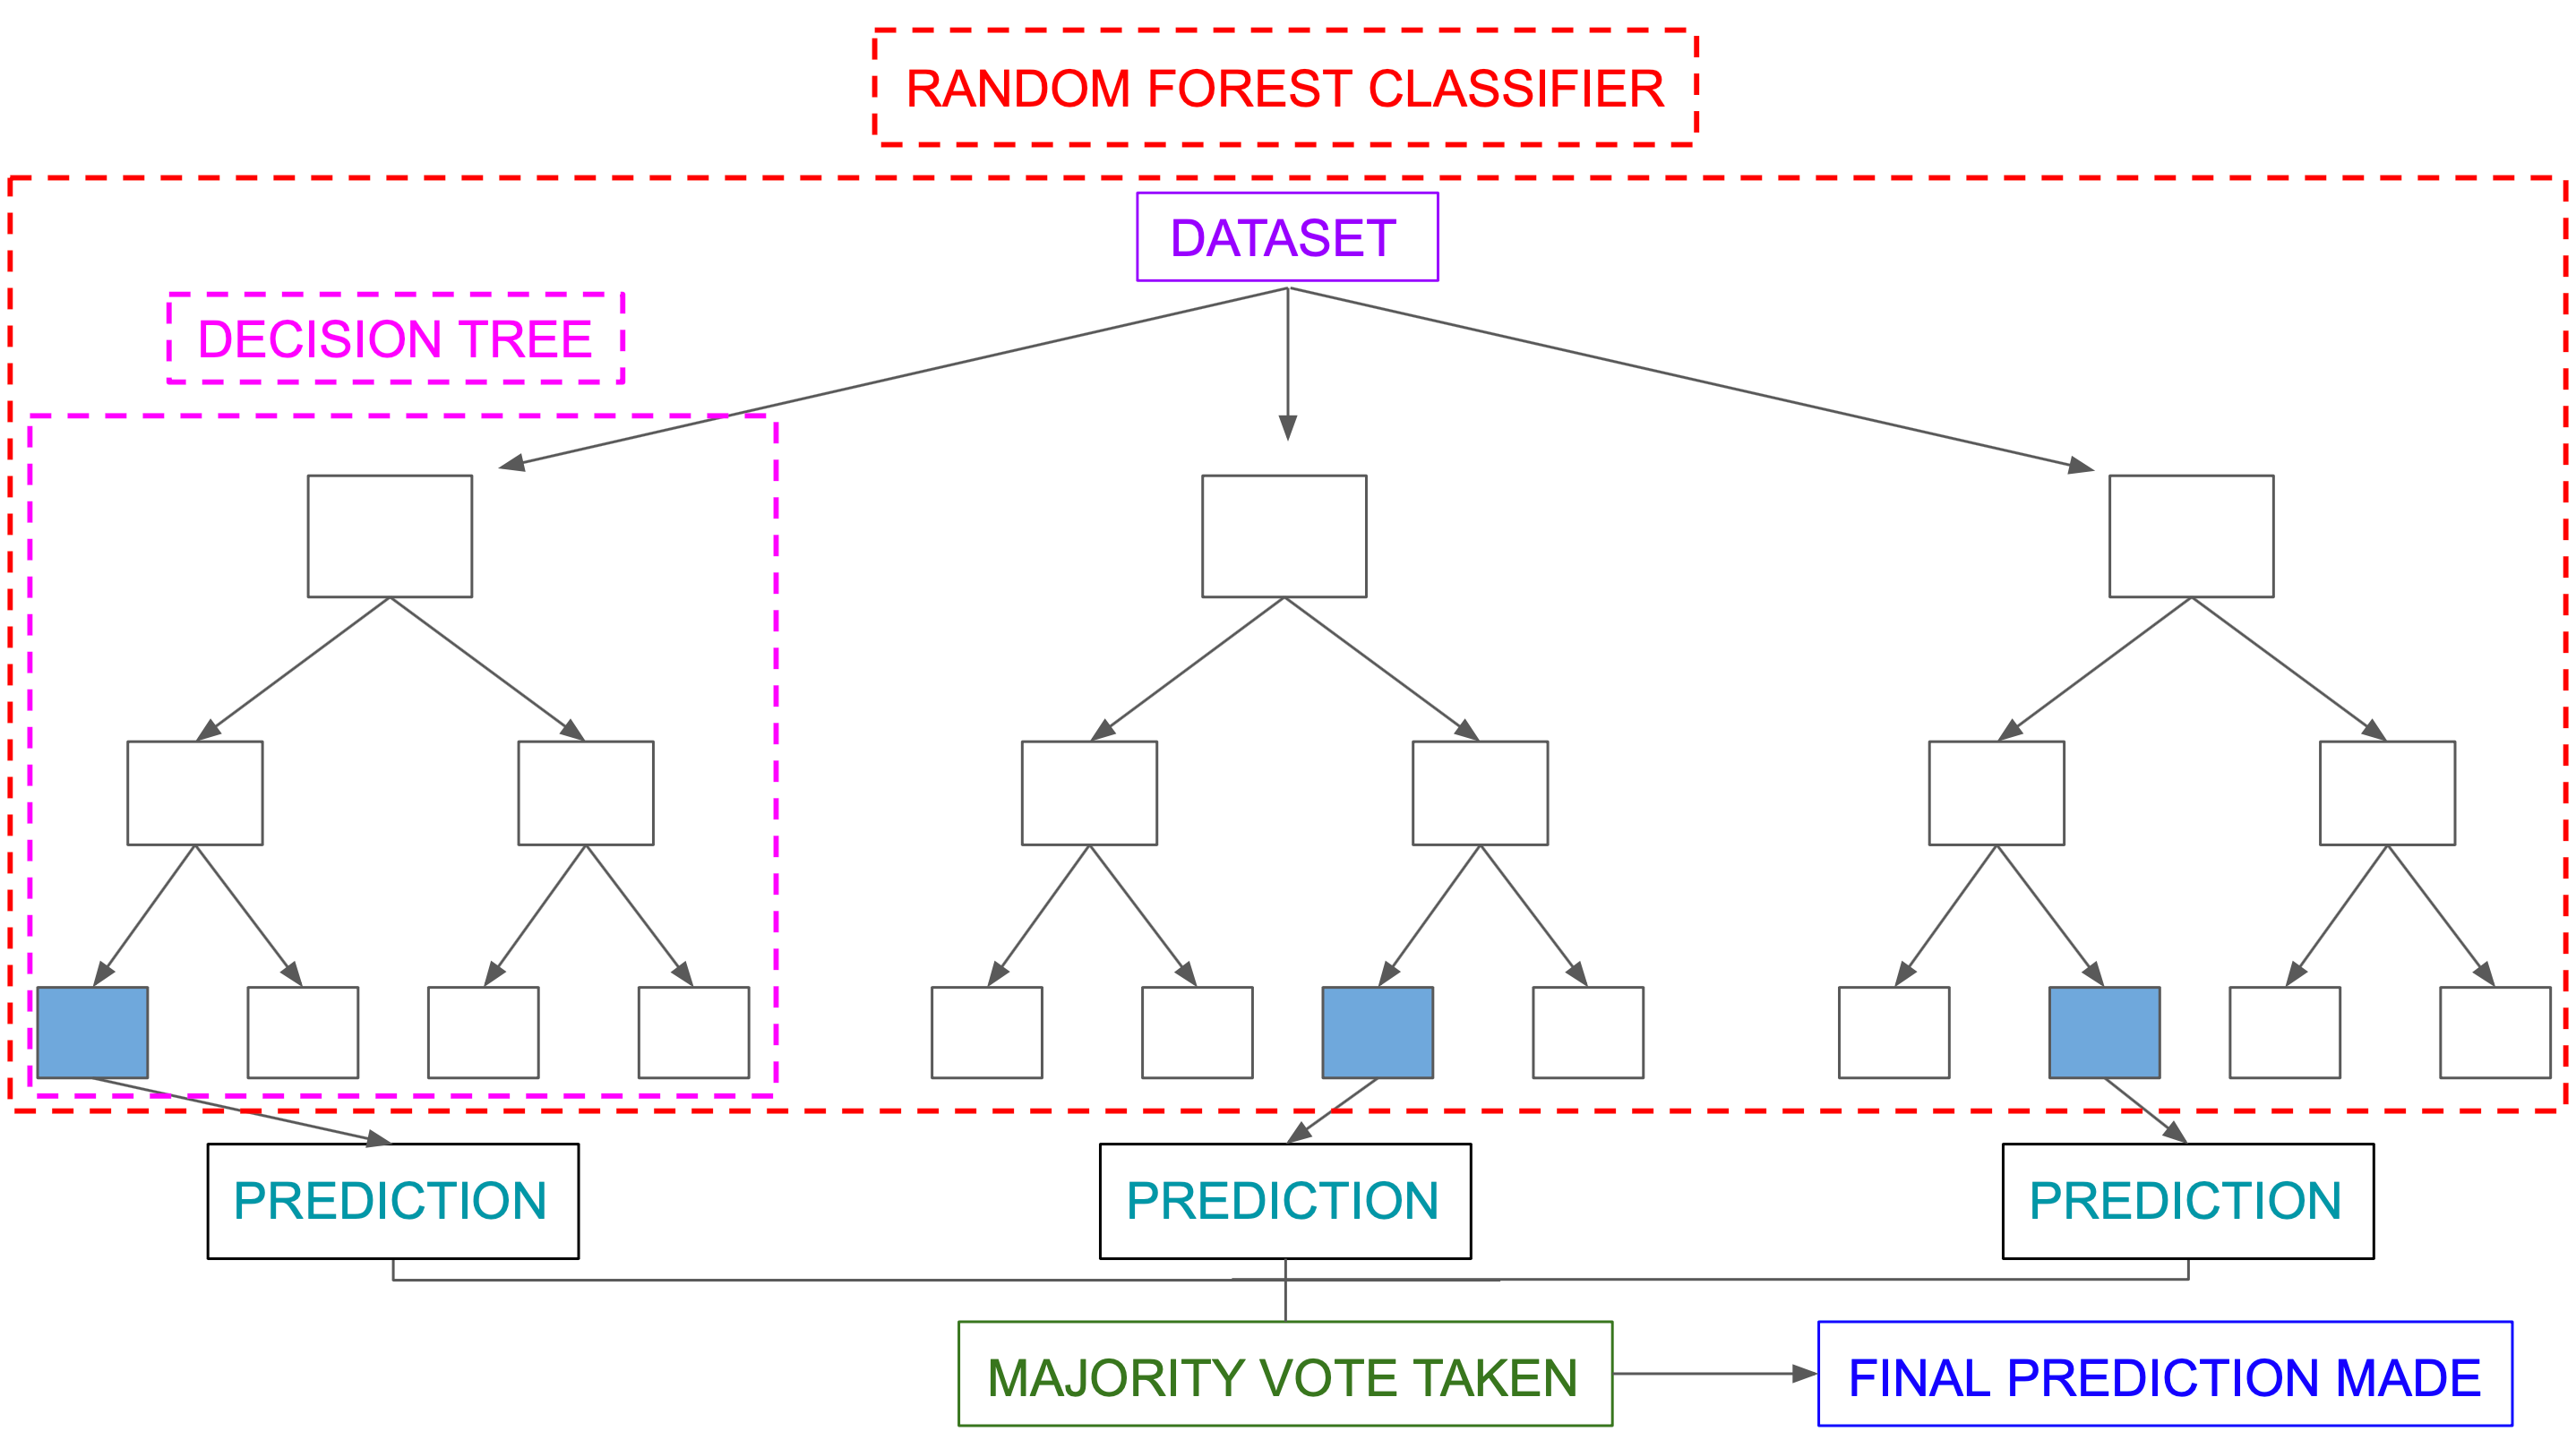

The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is:

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

The low correlation between models is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction.

In [38]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        82
           1       0.93      0.88      0.90       102

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

The accuracy for 1 : 0.8984935437589671
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        82
           1       0.91      0.79      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8482783357245336
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.98      0.63      0.77        82
           1       0.77      0.99      0.87       102

    accuracy                           0.83  

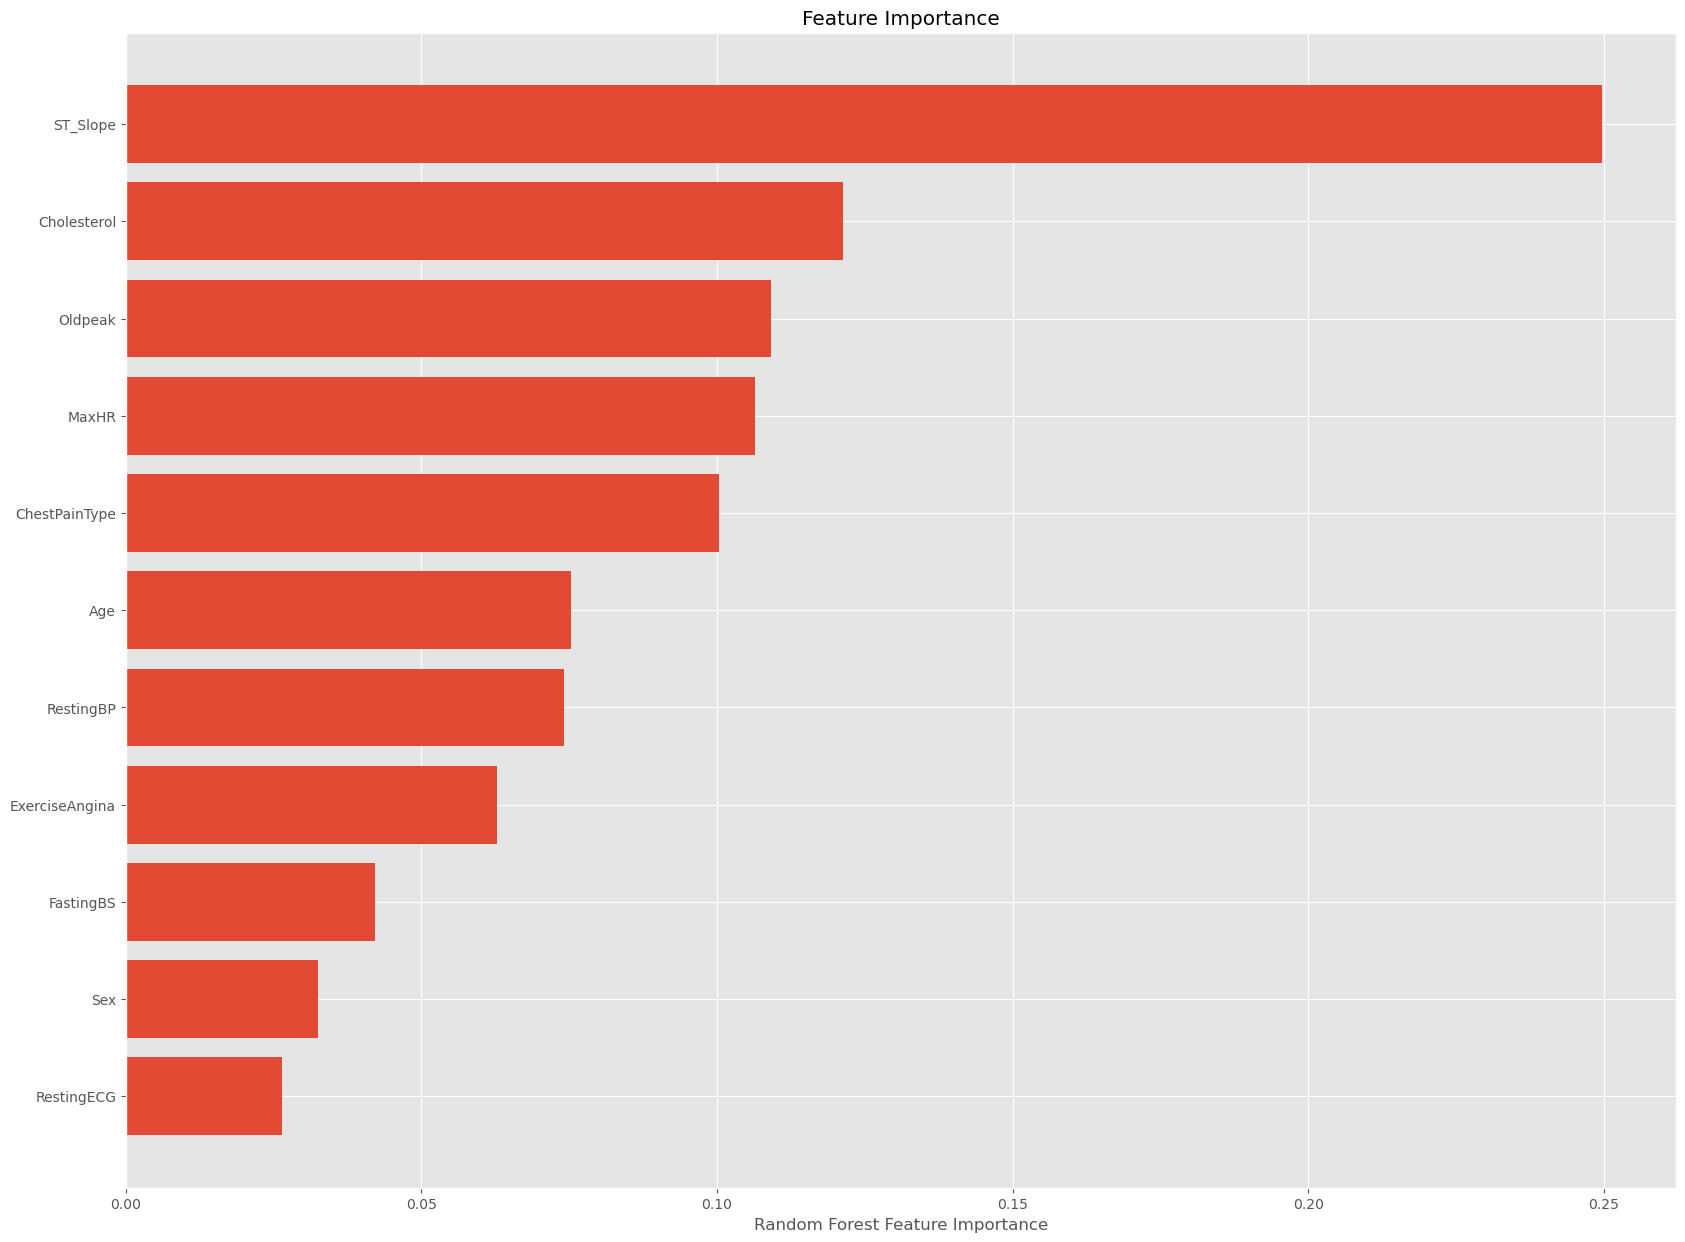

In [39]:
## Checking Feature importance 

plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

### Using XGBoost

Unlike many other algorithms, XGBoost is an ensemble learning algorithm meaning that it combines the results of many models, called base learners to make a prediction.

Just like in Random Forests, XGBoost uses Decision Trees as base learners:

However, the trees used by XGBoost are a bit different than traditional decision trees. They are called CART trees (Classification and Regression trees) and instead of containing a single decision in each “leaf” node, they contain real-value scores of whether an instance belongs to a group. After the tree reaches max depth, the decision can be made by converting the scores into categories using a certain threshold.

In [41]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 3.7/124.9 MB 24.3 MB/s eta 0:00:05
   --- ------------------------------------ 9.7/124.9 MB 26.3 MB/s eta 0:00:05
   ----- ---------------------------------- 16.0/124.9 MB 27.2 MB/s eta 0:00:05
   ------- -------------------------------- 22.0/124.9 MB 27.9 MB/s eta 0:00:04
   --------- ------------------------------ 28.3/124.9 MB 28.0 MB/s eta 0:00:04
   ----------- ---------------------------- 34.6/124.9 MB 28.2 MB/s eta 0:00:04
   ------------ --------------------------- 40.4/124.9 MB 27.9 MB/s eta 0:00:04
   -------------- ------------------------- 46.7/124.9 MB 28.3 MB/s eta 0:00:03
   ---------------- ----------------------- 53.0/124.9 MB 28.3 MB/s eta 0:00:03
   ------------------ --------------------- 59.0/124.9 MB 28.5 MB/s eta 0:00:03
   --------------------- ------------------ 66.1/124.9 MB 28.8 MB/s eta 0:00:03
   ----------------------- ---------------- 73.1/12

In [42]:
from xgboost import XGBClassifier
acc_XGB=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=XGBClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_XGB.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        82
           1       0.93      0.84      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184

The accuracy for 1 : 0.884983261597322
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.61      0.75        82
           1       0.76      0.98      0.85       102

    accuracy                           0.82   

### Choosing the best evaluation Matrix

If we talk about classification probelms the most common metrics used are:

- Accuracy
- Precision (P)
- Recall (R)
- F1 Score (F1)
- Area under the ROC (Reciever Operating Characteristic) curve or simply AUC.

If we calculate the area under the ROC curve, we are calculating another metric which is used very often when you have a dataset which has  skewed binary targets. This metric is known as the Area Under ROC Curve or Area Under Curve or just simply AUC. There are many ways to calculate the area under the ROC curve. AUC is a widely used metric for skewed binary classification tasks in the industry,and a metric everyone should know about.

- Log loss:

  Log Loss = - 1.0 ( target log(prediction) + (1 - target) * log(1 - prediction) )

Most of the metrics that we discussed until now can be converted to a multi-class version. The idea is quite simple. Let’s take precision and recall. We can calculate precision and recall for each class in a multi-class classification problem.

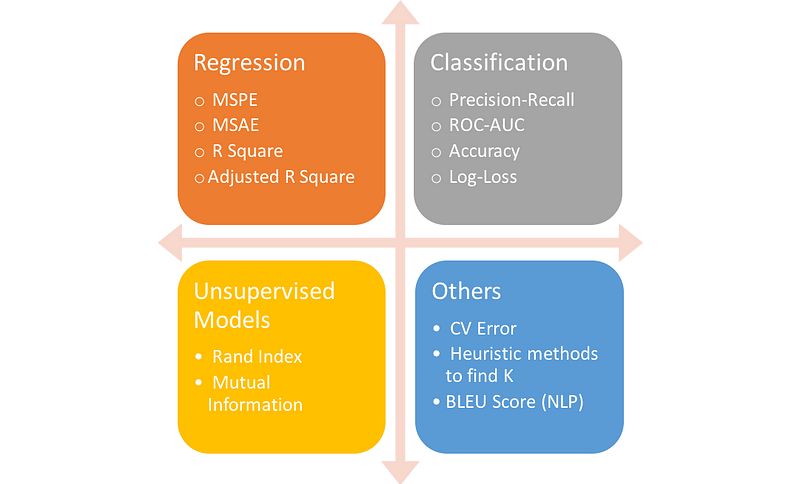